# Plotting ROC-AUC curves of the prediction results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import roc_curve, auc

In [3]:
results_dir = '/Users/dimi/GoogleDrive/PhD/4_PHAGEHOST_LEARNING/43_RESULTS/models'

## K-fold evaluation results

In [3]:
language_xgb = pd.read_csv(results_dir+'/v2.2/language_xgb_scores.csv')
hdc_bind_rf = pd.read_csv(results_dir+'/v2.2/hdc_bind_rf_scores.csv')
hdc_concat_rf = pd.read_csv(results_dir+'/v2.2/hdc_concat_rf_scores.csv')
hdc_bind_cs = pd.read_csv(results_dir+'/v2.2/hdc_bind_cosine_scores.csv')
hdc_concat_cs = pd.read_csv(results_dir+'/v2.2/hdc_concat_cosine_scores.csv')
hdc_structured = pd.read_csv(results_dir+'/v2.2/hdc_structured_scores.csv')

Text(0, 0.5, 'TPR')

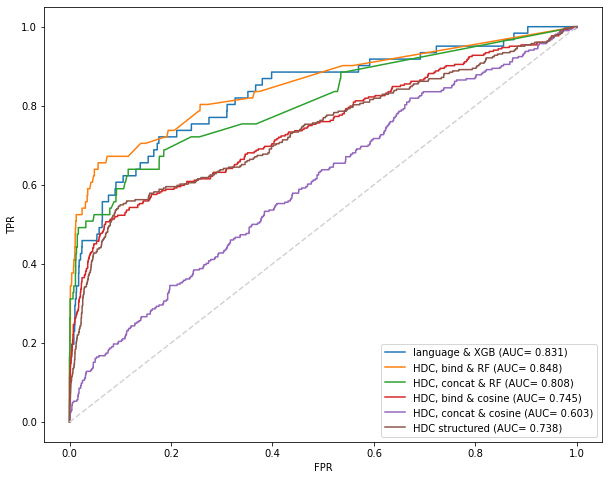

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
labels = ['language & XGB', 'HDC, bind & RF', 'HDC, concat & RF', 'HDC, bind & cosine', 'HDC, concat & cosine',
         'HDC structured']
for i, data in enumerate([language_xgb, hdc_bind_rf, hdc_concat_rf, hdc_bind_cs, hdc_concat_cs, hdc_structured]):
    fpr, tpr, thresholds = roc_curve(data['labels'], data['scores'])
    AUC = round(auc(fpr, tpr), 3)
    ax.plot(fpr, tpr, label=labels[i]+' (AUC= '+str(AUC)+')')
ax.plot([0, 1], [0, 1], ls='--', c='lightgrey')
ax.legend()
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
fig.savefig(results_dir+'/v2.2/ROC_AUC_CURVES.png', dpi=400)

## Randomized labels results

In [4]:
language_xgb = pd.read_csv(results_dir+'/v2.2/language_xgb_scores_random.csv')
hdc_bind_rf = pd.read_csv(results_dir+'/v2.2/hdc_bind_rf_scores_random.csv')
hdc_concat_rf = pd.read_csv(results_dir+'/v2.2/hdc_concat_rf_scores_random.csv')
hdc_bind_cs = pd.read_csv(results_dir+'/v2.2/hdc_bind_cosine_scores_random.csv')
hdc_concat_cs = pd.read_csv(results_dir+'/v2.2/hdc_concat_cosine_scores_random.csv')
hdc_structured = pd.read_csv(results_dir+'/v2.2/hdc_structured_scores_random.csv')

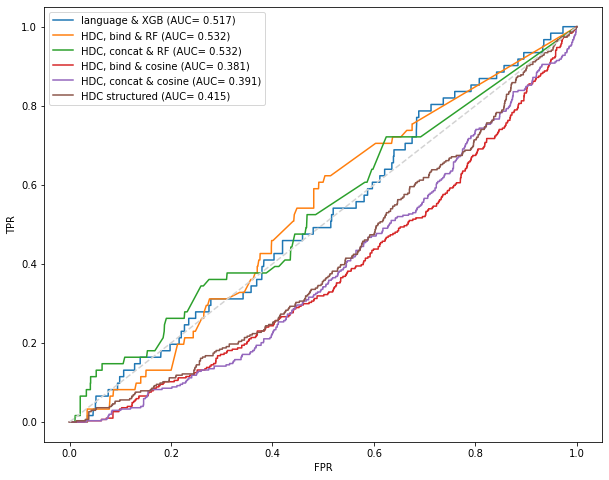

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
labels = ['language & XGB', 'HDC, bind & RF', 'HDC, concat & RF', 'HDC, bind & cosine', 'HDC, concat & cosine',
         'HDC structured']
for i, data in enumerate([language_xgb, hdc_bind_rf, hdc_concat_rf, hdc_bind_cs, hdc_concat_cs, hdc_structured]):
    fpr, tpr, thresholds = roc_curve(data['labels'], data['scores'])
    AUC = round(auc(fpr, tpr), 3)
    ax.plot(fpr, tpr, label=labels[i]+' (AUC= '+str(AUC)+')')
ax.plot([0, 1], [0, 1], ls='--', c='lightgrey')
ax.legend()
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
fig.savefig(results_dir+'/v2.2/ROC_AUC_CURVES_random.png', dpi=400)